### Sel'kov Bifurcation - D-CODE performance vs Parsimony coefficient

!! DO NOT RUN !!

In this case, results are equivalents in terms of RMSE and estimated trajectories. But ODE associated to parsimony_coefficient = 0.01 are much simpler and do not suffer from any computational issue, while case 0.001 does, being able to estimate only 3 trajectories out of 5.


Confronto fra SR-T e D-CODE su Sel’kov, sul caso b=0.6:
		- SR-T (parsimony=0.01): bad result s
		- SR-T (parsimony=0.001): bene eq.1, pessimo su eq.2, ha anche problemi con l’integrazione che fallisce in un caso. RMSE: 0.757
		- D-CODE (parsimony=0.01): risultati di complessità accettabile, anche se la maggior parte delle volte non trova l’ode corretta, soprattutto nel caso dell’ eq1
			le traiettorie ricostruite sono però coerenti e molto migliori di SR-T nel caso di eq.2. RMSE: 0.0889
		- D-CODE (parsimony=0.001): spesso complessità esagerata (BLOAT), portando anche a malfunzionamenti dell’algoritmo, che in un caso da errore. C’è un problema di overfitting, anche 			se le equazioni identificate sono coerenti (da lottare le traiettorie)

In [1]:
# add the parent directory to the system path:
import sys
from pathlib import Path
parent_dir = Path('..').resolve() 
sys.path.append(str(parent_dir)) 

# import:
import numpy as np
import os
import matplotlib.pyplot as plt
from evaluation_trajectories import evaluation2D, evaluation2D_partial, evaluation2D_p, evaluation2D_partial_p

In [2]:
# select the ODE:
ode_name_09 = 'SelkovODE_rho_09'
init_high_09 = [0.05, 0.05, 0.9]
init_low_09 = [0.05, 0.05, 0.9]

ode_name_06 = 'SelkovODE_rho_06'
init_high_06 = [0.05, 0.05, 0.6]
init_low_06 = [0.05, 0.05, 0.6]

ode_name_04 = 'SelkovODE_rho_04'
init_high_04 = [0.05, 0.05, 0.4]
init_low_04 = [0.05, 0.05, 0.4]

ode_name_03 = 'SelkovODE_rho_03'
init_high_03 = [0.05, 0.05, 0.3]
init_low_03 = [0.05, 0.05, 0.3]

ode_param=None
x_id = 0
freq = 10
n_sample = 50 
noise_ratio = 0.01
alg = 'vi'
seed = 0
n_seed = 5

### b = 0.6, parsimony_coefficient=0.01:
RMK. se c'è bisogno di rifare i grafici, cambiare il nome alla cartella in cui sono salvati i risultati

5
0.0
[0.016583076733144, 0.05163467992478862, 0.009737884623456268, 0.01693375052790685, 0.0739576714139282]
0.03376941264464479


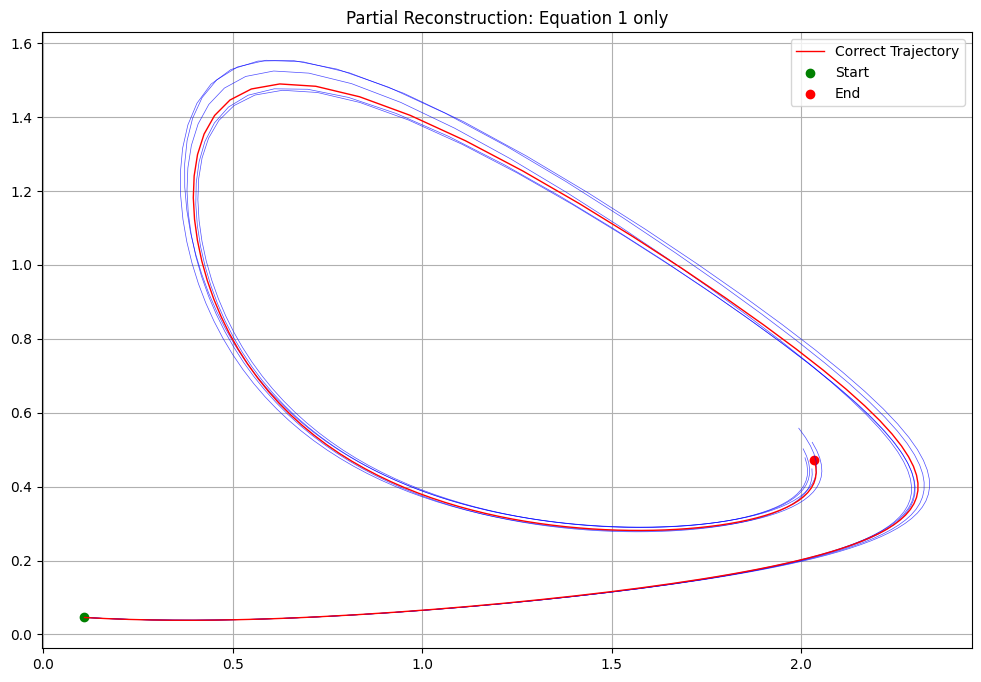

In [3]:
# Partial Reconstruction: Equation 1 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_06, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_06, init_low_06)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 1 only')
plt.legend()
plt.grid(True) 


5
0.4
[0.0958250308904051, 0.16619546272610541, 0.05515057709748128, 0.0343760594845863, 0.15312558486008376]
0.10093454301173237


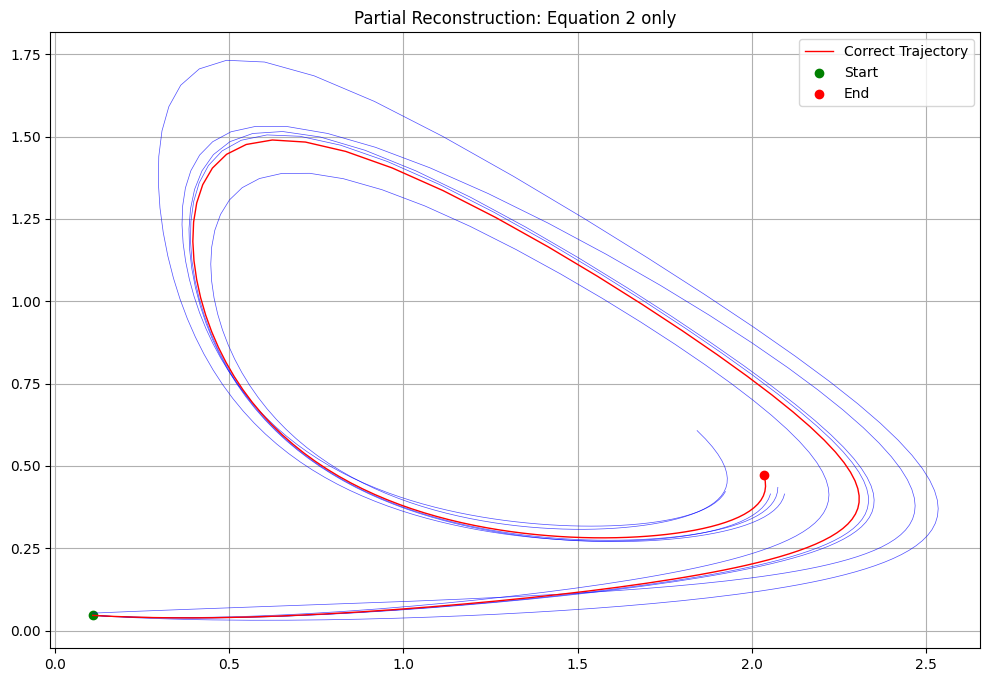

In [4]:
# Partial Reconstruction: Equation 2 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_06, ode_param, 1, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_06, init_low_06)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 2 only')
plt.legend()
plt.grid(True) 

5
0.0
0.4
[0.1132257019949934, 0.13030753599311745, 0.05228257410155002, 0.032823969385705414, 0.11604721319903247]
0.08893739893487976


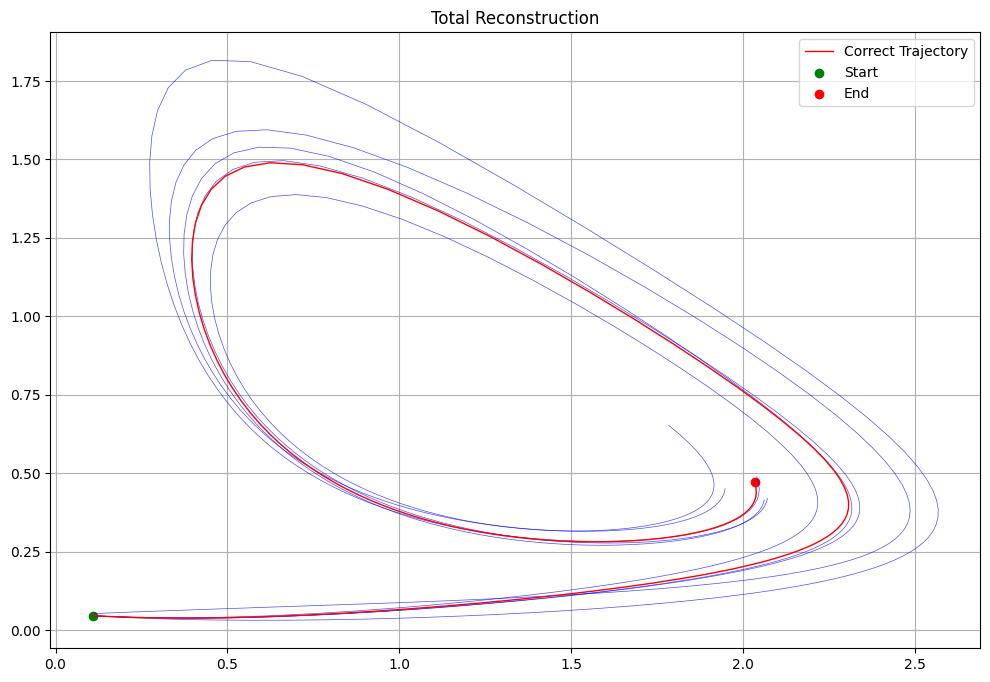

In [5]:
# Total Reconstruction:
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_p(ode_name_06, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_06, init_low_06)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Total Reconstruction')
plt.legend()
plt.grid(True) 

### b = 0.6, parsimony_coefficient=0.001:
RMK. se c'è bisogno di rifare i grafici, cambiare il nome alla cartella in cui sono salvati i risultati

5
0.0
[0.017644729469217937, 0.014002890486935652, 0.0352385120830836, 0.05843108118681192, 0.04697796945950467]
0.03445903653711076


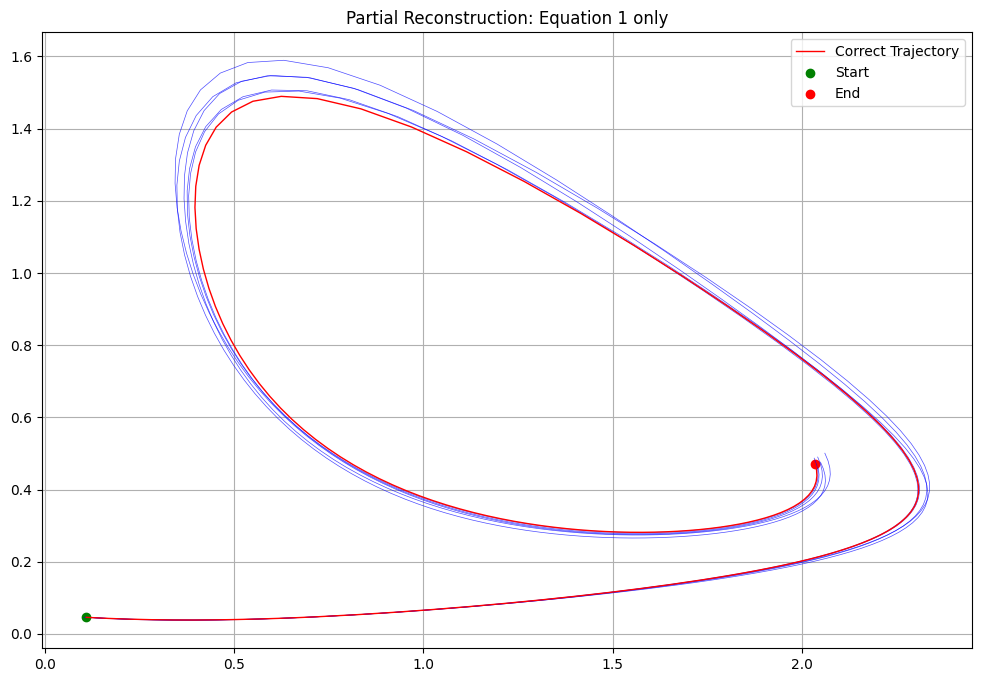

In [3]:
# Partial Reconstruction: Equation 1 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_06, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_06, init_low_06)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 1 only')
plt.legend()
plt.grid(True) 


4
0.25


/Users/grgromano/miniconda3/envs/d-code_grg/lib/python3.12/site-packages/scipy/integrate/_ode.py:431: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


Skipping this seed
[0.0925873494352974, 0.0576903715616381, 0.07742807603123378]
0.07590193234272309


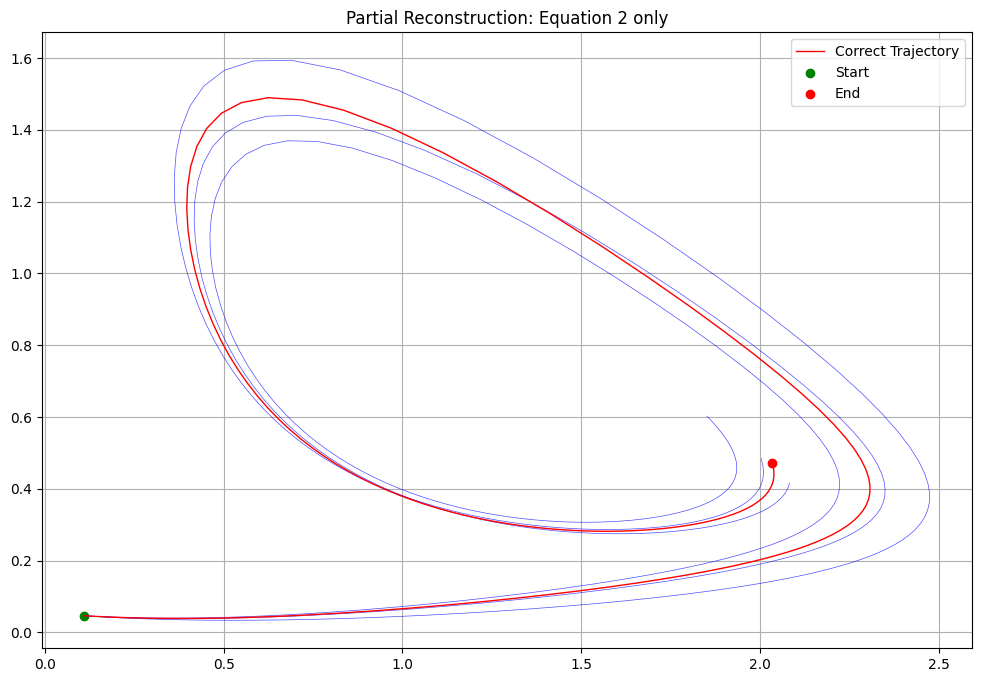

In [4]:
# Partial Reconstruction: Equation 2 only
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_partial_p(ode_name_06, ode_param, 1, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_06, init_low_06)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Partial Reconstruction: Equation 2 only')
plt.legend()
plt.grid(True) 

4
0.0
0.25
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
Skipping this seed
[0.07622659674821944, 0.035366800107041234, 0.08008210263832788]
0.06389183316452952
      in above,  r1 =  0.7377895659767D+01   r2 =  0.4103272796629D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7377895659767D+01   r2 =  0.4103272796629D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7377895659767D+01   r2 =  0.3301445967447D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue a

/Users/grgromano/miniconda3/envs/d-code_grg/lib/python3.12/site-packages/scipy/integrate/_ode.py:431: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


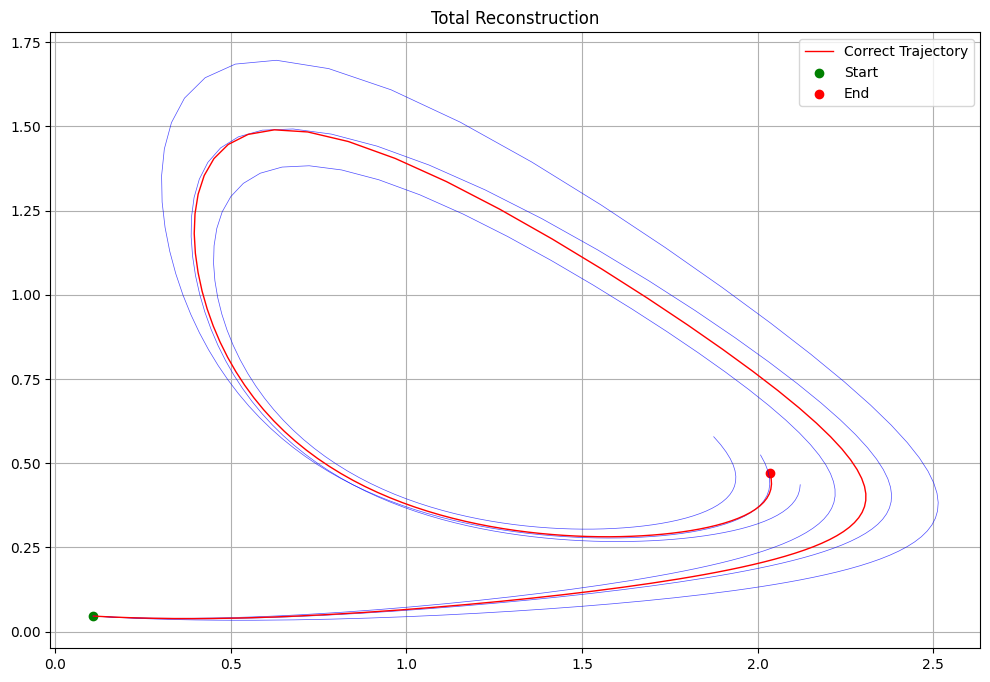

In [5]:
# Total Reconstruction:
# evaluation: 
xt_true, est_trajectories, rmse = evaluation2D_p(ode_name_06, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high_06, init_low_06)
print(rmse)

# plot:
plt.figure(figsize=(12, 8))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(est_trajectories[i][:, 0, 0], est_trajectories[i][:, 0, 1], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(xt_true[:, 0, 0], xt_true[:, 0, 1], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(xt_true[:, 0, 0][0], xt_true[:, 0, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0, 0][-1], xt_true[:, 0, 1][-1], color='red', label='End')

plt.title('Total Reconstruction')
plt.legend()
plt.grid(True) 